#  Today's session

In today's session, we will be working with networks and, in particular, with protein-protein interacion networks, also called *interactomes*. For this, we will be using two different modules. For **network analysis**, we will be using [NetworkX](https://networkx.github.io/), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Some of NetworkX features include:

- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g., text, images, XML records)
- Edges can hold arbitrary data (e.g., weights, time-series)

For studying **interactomes**, we will be getting data from the [BioGrid database](https://thebiogrid.org/), an interaction repository with data compiled through comprehensive curation efforts. We could, of course, go to BioGrid and gather data manually. But, as usual, if we want to do that repeteadly, we'd rather write some code to do it for us. To automate the task of getting data from BioGrid we will be using the [Orange Bioinformatics](https://pythonhosted.org/Orange-Bioinformatics/index.html) package, wich provides functionality for some elementary tasks in bioinformatics, including getting protein-protein interaction data.

In the final exercise we will be investigating the SARS-coronavirus-host interactome, that is, the whole set of known interactions between the proteins of the SARS-CoV-2 virus and human proteins.  

# Network analysis with NetworkX

Here, we will introduce the basic functionalities of NetworkX for network analysis. For a more complete introduction, you can take a look the the [complete documentation](https://networkx.github.io/).

## Creating a graph

We start by importing `networkx` and then creating a graph:

In [1]:
import networkx as nx
G = nx.Graph()

By definition, a `Graph` is a collection of **nodes** (or **vertices**) along with
identified pairs of connected nodes, which we call **edges** or **links**. The graph we just created is an empty graph, that is, it contains no nodes and no edges.

***

### Interlude: classes in Python

Python is an object-oriented programming language, like Java or C++. So far, we have avoided discussing this issue in detail, but now is a good time to stop and reflect about this for just a second.

Indeed, most variables in Python are *instances* of classes. For example, the graph `G` we just created is an instance of the `Graph()` class defined by NetworkX. As in any object-oriented programming language, classes have *attributes* (variables that store data for each instance of a class) and *methods* (functions that act on each instance of the class). For example, the a `Graph()` instance has an **attribute** `name` that stores a label for the whole graph. To get the value of an attribute in Python, we use `instance_name.atribute_name`, so to get the name of the graph we created we can do

In [2]:
G.name

''

Because we haven't specified any value for this attribute, it contains and empty string, which is the default value for the `name` attribute. To change the `name` of the graph we can simply do

In [3]:
G.name = 'My test graph'
print(G.name)

My test graph


Alternatively, one can often specify attribute values when the class is instantiated for the first time

In [4]:
G = nx.Graph(name='Friendships')
print(G.name)

Friendships


Similarly, **methods** are called like any function using `instance_name.method_name()` (or specifying parameters in the parenthesis, if necessary). For example, to count the number of nodes in a network, we can use the `.number_of_nodes()` method:

In [5]:
G.number_of_nodes()

0

Well, of course---we still don't know how to add nodes and edges, so our graph contains no nodes yet.

### Exercise

Use the `help()` function to identify two methods of the `Graph()` class, other than `.number_of_nodes()`.

In [6]:
# Write your code here

*Here, write and briefly describe two methods of your choice for the `Graph()` class.*

***

## Nodes

In NetworkX, nodes can
be almost anything, for example an integer number, a text string, an image, an XML object, another
Graph, a customized node object, etc.

The graph `G` can be grown in several ways. To get started, though, we’ll look at simple node additions. You can add one node at a time,

In [7]:
G.add_node('Alice')
print(G.number_of_nodes())

1


or add a list of nodes

In [8]:
G.add_nodes_from(['Bob', 'Carla'])
print(G.number_of_nodes())

3


In fact, with `.add_nodes_from()` we can add nodes from any iterable object, no only a list. And talking about iteration---let's see what happens if we iterate over a graph:

In [9]:
for whatIsThis in G:
    print(whatIsThis)

Alice
Bob
Carla


Fantastic! Iteration over a `Graph()` goes over the nodes of the graph! And, since `.add_nodes_from()` can take any iterator as its argument (not just a list, as we just saw), we can easily create a new graph copying the nodes of an existing graph:

In [10]:
Gtwin = nx.Graph(G)
print(Gtwin.nodes)

['Alice', 'Bob', 'Carla']



***

### Exercise

Create a graph named `G40` containing 40 nodes labeled with integers 0 to 39.

In [11]:
# Write your code here

***

## Edges

`G` can also be grown by adding one edge at a time:

In [12]:
G.add_edge('John', 'Mary')
print(G.nodes)
print(G.edges)

['Alice', 'Bob', 'Carla', 'John', 'Mary']
[('John', 'Mary')]


Note that when we add an edge, the edge is created and, if the corresponding nodes do not exist, they are added as well.

Just like nodes, we can add a bunch of edges simultaneously, using a list or any iterable object:

In [13]:
G.add_edges_from([('Alice', 'Bob'), ('Alice', 'Mary'), ('Alice', 'Carla')])
print(G.edges)

[('Alice', 'Bob'), ('Alice', 'Mary'), ('Alice', 'Carla'), ('John', 'Mary')]


See Algorithms for details on graph algorithms
supported.

## Drawing graphs

NetworkX is *not* primarily a graph drawing package but basic drawing with
Matplotlib (as well as an interface to use the open source Graphviz software) are included.  These are part of the `networkx.drawing` module and will
be imported if possible.

Let's see a simple example of how to display a network with NetworkX. First import Matplotlib’s plot interface:

In [14]:
import matplotlib.pyplot as plt

The simplest way to plot a graph is by using the generic `.draw()` method. Let's plot the `Friendship` graph we have created in the preceeding sections:

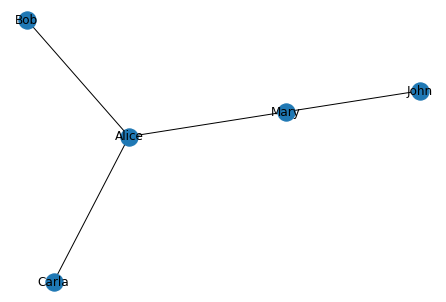

In [15]:
nx.draw(G, with_labels=True)
plt.show()

The look of figures can be changed using the arguments of the draw function. For example:

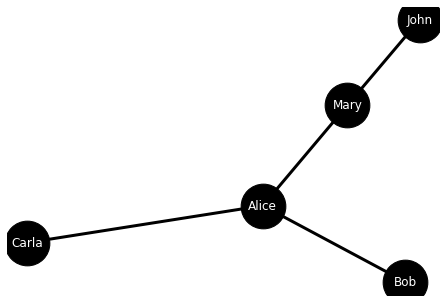

In [27]:
nx.draw(G, with_labels=True, font_color='white', node_color='black', node_size=2000, width=3)
plt.show()

Note that arguments refering to node (or edge) properties can be a single value (as in `node_color='black'`) or a list with a value for each node (that is, a list with *exactly* as many values as nodes), as in the following example:

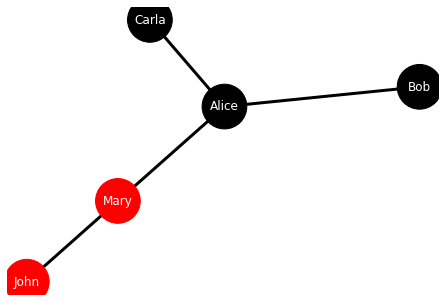

In [29]:
colors = ['black', 'black', 'black', 'red', 'red']
nx.draw(G, with_labels=True, font_color='white', node_color=colors, node_size=2000, width=3)
plt.show()

***

### Exercise

Take a look at all the arguments for `nx.draw()` [here](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) and draw the network again with:
* Node size proportional to each person's number of connections.
* A different node shape for males and females.
* A different color for names with 5, 4, and 3 letters.

In [26]:
# Write your code here

***

The size of a figure can be modified by defining a Matplotlib figure first:

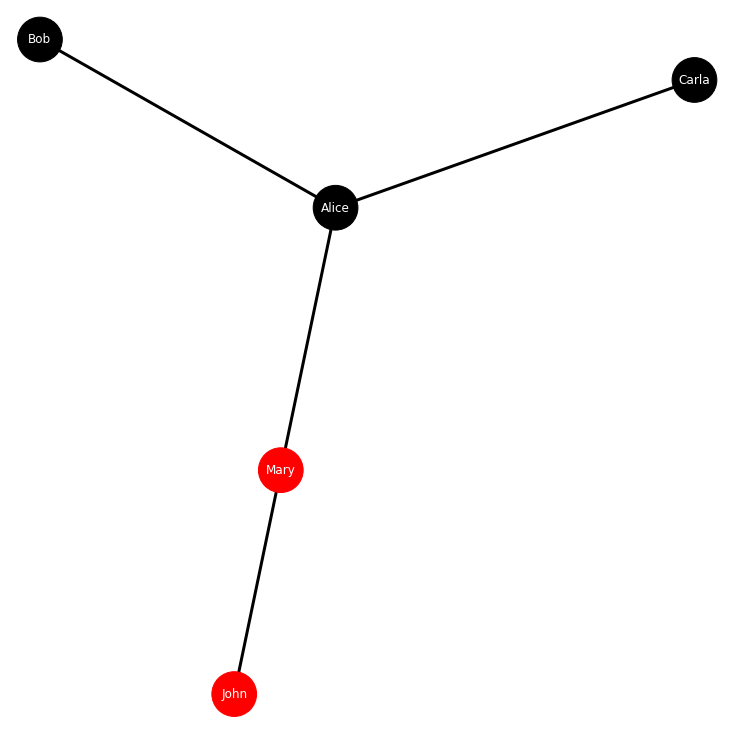

In [60]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_color='white', node_color=colors, node_size=2000, width=3)
plt.show()

Perhaps more importantly, NetworkX provides several different layout algorithms, which can be used to specify the positions of the nodes. The complete list of layout algorithms (along with the arguments they take) is available [here](https://networkx.github.io/documentation/latest/reference/drawing.html#module-networkx.drawing.layout), and here are a few examples:

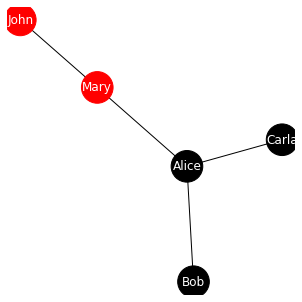

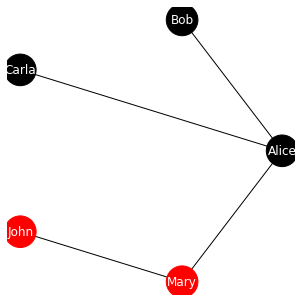

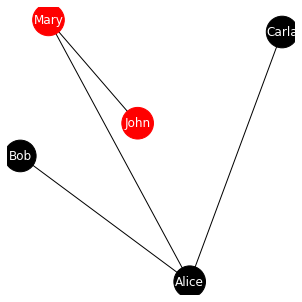

In [61]:
# Spring layout
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G, k=1)
nx.draw(G, with_labels=True, pos=pos, font_color='white', node_color=colors, node_size=1000, width=1)
plt.show()

# Circular layout
plt.figure(figsize=(4, 4))
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos, font_color='white', node_color=colors, node_size=1000, width=1)
plt.show()

# Random layout
plt.figure(figsize=(4, 4))
pos = nx.random_layout(G)
nx.draw(G, with_labels=True, pos=pos, font_color='white', node_color=colors, node_size=1000, width=1)
plt.show()

To save drawings to a file, use the `.save()` method in Matplotlib:

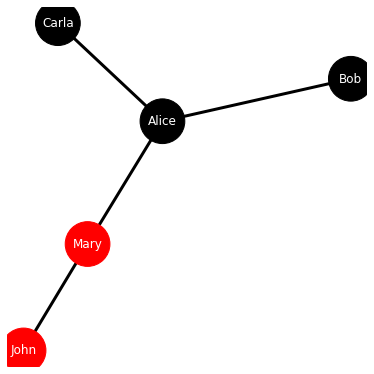

In [62]:
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, font_color='white', node_color=colors, node_size=2000, width=3)
plt.savefig("Media/test_net.pdf")
plt.show()

## Examining and removing nodes and edges

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`. They offer a continually updated read-only view into
the graph structure. If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [65]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj['Alice']))
print(G.degree['Alice'])

['Alice', 'Bob', 'Carla', 'John', 'Mary']
[('Alice', 'Bob'), ('Alice', 'Mary'), ('Alice', 'Carla'), ('John', 'Mary')]
['Bob', 'Mary', 'Carla']
3


One can specify to report the edges and degree from a subset of all nodes
using an *nbunch*. An *nbunch* is any of: None (meaning all nodes), a node,
or an iterable container of nodes that is not itself a node in the graph.

In [68]:
print(G.edges(['John', 'Bob']))
print(G.degree(['John', 'Bob']))

[('John', 'Mary'), ('Bob', 'Alice')]
[('John', 1), ('Bob', 1)]


One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`.

## Graph operators and network models

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   complement(G)            - graph complement
   create_empty_copy(G)     - return an empty copy of the same graph class
   to_undirected(G) - return an undirected representation of G
   to_directed(G)   - return a directed representation of G
   ```

1. Using an existing network model, as in the following examples:

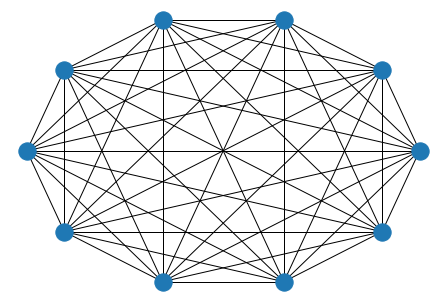

In [72]:
# Complete graph
testg = nx.complete_graph(10)
pos = nx.circular_layout(testg)
nx.draw(testg, pos=pos)

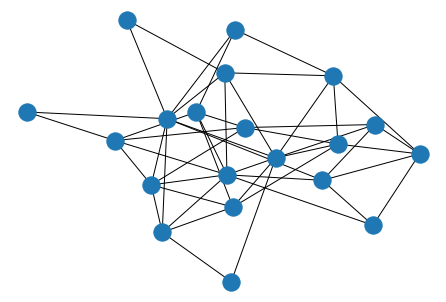

In [75]:
# Random graph
testg = nx.erdos_renyi_graph(20, 0.2)
pos = nx.spring_layout(testg)
nx.draw(testg, pos=pos)

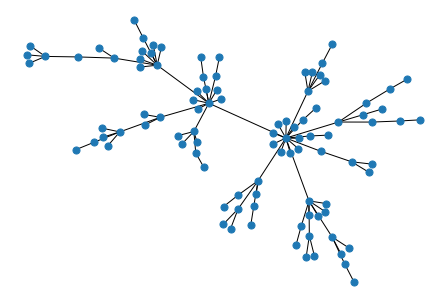

In [85]:
# Preferential attachment graph
testg = nx.barabasi_albert_graph(100, 1)
pos = nx.spring_layout(testg, iterations=100)
nx.draw(testg, pos=pos, node_size=50)

***

### Exercise

Use the help function to describe what an Erdos-Renyi graph is.

In [88]:
# Write your code here

*Explain, using your own words, what an Erdos-Renyi graph is.*

***

## Analyzing networks

The structure of a network can be analyzed using various graph-theoretic
functions that you have seen in the theoretical lectures. For example, one can easily find connected componentsgraph of the network:

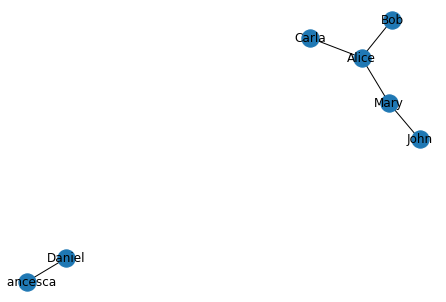

[{'Mary', 'Alice', 'John', 'Bob', 'Carla'}, {'Francesca', 'Daniel'}]


In [99]:
# Make the `Friendship` graph more interesting
G.add_edge('Daniel', 'Francesca')
nx.draw(G, with_labels=True)
plt.show()

# Get the connected components
print(list(nx.connected_components(G)))

As we have already seen, it is also straightforward to get the degree of each node (that is, the number of connections of each node):

In [97]:
print(G.degree())

[('Alice', 3), ('Bob', 1), ('Carla', 1), ('John', 1), ('Mary', 2), ('Daniel', 1), ('Francesca', 1)]


Similary, we can get the clustering coefficient of the network, shortest paths between nodes, etc.

In [108]:
print(nx.clustering(G))
print(nx.average_clustering(G))
print(nx.shortest_path(G, 'Carla', 'John'))

{'Alice': 0, 'Bob': 0, 'Carla': 0, 'John': 0, 'Mary': 0, 'Daniel': 0, 'Francesca': 0}
0.0
['Carla', 'Alice', 'Mary', 'John']


For a complete list of all the algorithms implemented in NetworkX, look [here](https://networkx.github.io/documentation/latest/reference/algorithms/index.html).

***

### Exercise

Recall, from the theoretical class, what the clustering coefficient of a node is. Then, think why the clustering coefficient of all nodes in the network above was 0, and *add only one edge to the network* so that the clustering of at least one node becomes larger than 0. Then, calculate the [average clustering coefficient](https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html) of the network.

In [101]:
# Write your code here

***

#  Getting Biogrid data with the Orange Bioinformatics module

So far, we have seen how to build and analyze networks using NetworkX. In general, when dealing with biological data we do *not* want to build networks by adding nodes and edges one by one, but rather get data from some database. Here, we will see how to get data from the [BioGrid](https://thebiogrid.org/) protein interaction database. To automate this task, we will be using the [Orange Bioinformatics](https://pythonhosted.org/Orange-Bioinformatics/) Python module. Here, we just introduce the basics---for more details, take a look at all the protein-protein interaction capabilities of Orange Bioinformatics [here](https://pythonhosted.org/Orange-Bioinformatics/reference/ppi.html).

Let's first import the necessary protein-protein interaction (PPI) tools, and then create an instance of the `BioGRID()` class:

In [110]:
from orangecontrib.bio import ppi
biogrid = ppi.BioGRID()

Now, we would typically want to get a list of proteins and protein-protein interactions for a given organism. Let's start with the proteins. The method `.ids()` returns the list of all proteins in the database; if the `taxid` argument is specified, then only the proteins of a given organism (e.g. *E. coli*) are given:

In [115]:
# The NCBI taxonomic ID of E. coli str. K-12 substr. W3110 is 316407
proteins = biogrid.ids(taxid="316407")
print(proteins)

['4262089', '4262224', '4259628', '4263342', '4261236', '4260804', '4262204', '4260189', '4261715', '4262389', '4259637', '4262399', '4262634', '4259850', '4259613', '4259928', '4259818', '4260537', '4262139', '4263192', '4262327', '4260325', '4261097', '4261265', '4263434', '4260868', '4260687', '4259371', '4261876', '4260945', '4261746', '4262618', '4260734', '4263127', '4262228', '4263485', '4263364', '4259181', '4262977', '4261215', '4261219', '4262570', '4259451', '4263529', '4262567', '4259701', '4261242', '4263247', '4260069', '4261626', '4262422', '4260772', '4263362', '4259512', '4260660', '4262172', '4261228', '4259953', '4262538', '4260081', '4263431', '4261698', '4261085', '4262850', '4260538', '4259799', '4259726', '4260701', '4263128', '4261664', '4261158', '4261381', '4259583', '4261775', '4262756', '4261048', '4263080', '4263050', '4262342', '4263124', '4260071', '4262573', '4259455', '4263142', '4262495', '4262520', '4263345', '4260480', '4261522', '4262705', '4262052'

As you can see, the proteins are identified by a number rather than a name. To get all names of a given protein, we can use the `.synonyms()` method:

In [123]:
# Get the names of the first protein listed in BioGrid for E. coli
print('Protein:', proteins[0])
print('Names:', biogrid.synonyms(proteins[0]))

Protein: 4262089
Names: ['12933095', 'Y75_p3795', 'yhfX']


Great! Those (at least the last ones) look more like the protein names that biologist typically use (you can see more information about this protein in the [Uniprot databse](https://www.uniprot.org/uniprot/P45550)).

Finally, as mentioned above, we would typically be interested in getting the list of proteins that interact with a given protein, for example, the yhfX protein in *E. coli*:

In [128]:
print(biogrid.edges(proteins[0]))
print('Total number of interactions:', len(biogrid.edges(proteins[0])))

[('4262089', '4261708', -13.62), ('4262089', '4261462', -8.39), ('4262089', '4259495', -7.07), ('4262089', '4261990', -3.3), ('4262089', '4261656', -3.1), ('4262089', '4261563', -3.09), ('4262089', '4261991', -2.85), ('4262089', '4261203', -2.56), ('4262089', '4259329', -2.56), ('4262089', '4262124', -2.41), ('4262089', '4259624', -2.41), ('4262089', '4263110', -2.28), ('4262089', '4262127', -2.23), ('4262089', '4262126', -2.2), ('4262089', '4259869', -2.15), ('4262089', '4259711', -2.0), ('4261219', '4262089', -3.74968), ('4261085', '4262089', -3.82182), ('4260306', '4262089', 3.69692), ('4260032', '4262089', -5.47185), ('4260994', '4262089', 5.33669), ('4260247', '4262089', -8.09), ('4262198', '4262089', -6.61), ('4260480', '4262089', -6.31), ('4261590', '4262089', -6.09), ('4261641', '4262089', -5.98), ('4262430', '4262089', -5.63), ('4263220', '4262089', -5.5), ('4261940', '4262089', -5.22), ('4261250', '4262089', -4.69), ('4263077', '4262089', -4.49), ('4262567', '4262089', -4.05)

So, the yhfX protein in *E. coli* interacts with a total of 122 other proteins! Not bad!!

***

### Exercise

Get the degree of each protein in the *E. coli* interactome and plot the distribution of those degrees (for example, using the [`plt.hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) method from Matplotlib). 

In [130]:
# Write your code here

***

# Final exercise

As we investigated during the last session, the genome of the SARS-CoV-2 coronavirus that is causing the current COVID-19 pandemic is very similar to the genome of the 2002-2003 SARS-CoV virus. An article by [Gordon et al.](https://www.biorxiv.org/content/10.1101/2020.03.22.002386v1), published online on Sunday, March 22nd, 2020, reports the following coding regions in the SARS-CoV-2 genome

![SARS-CoV-2 genome](Media/sars-cov-2_genome.png)

Summarizing, the genome codes for 4 structural proteins (S, E, M, and N), 9 accessory factors (3a, 3b, 6, 7a, 7b, 8, 9b, 9c, and 10), and 16 non-structural proteins (Nsp1-16). Most of these proteins are very similar to those in the 2002-2003 virus, as shown in the following table:

![Protein table](Media/proteins.png)

Even more importantly, [Gordon et al.](https://www.biorxiv.org/content/10.1101/2020.03.22.002386v1) have 
identified many protein-protein interactions between SARS-CoV-2 proteins and human proteins, which should help undertand how the virus attacks human cells, and therefore point towards promising drug targets. I recommend that you read this article (as well as [this other article](https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1002331), which did a similar thing for the 2002-2003 SARS-CoV) to lear more about how network analysis of protein interactions can help us uncover drug targets to fight the COVID-19 epidemic.

**Here, we will map these protein-protein interactions into a network, and analyze them in the context of the human interactome.**

1. Using what you learned in the last session, explain (without actually doing it) how would you obtain the sequence similarity with SARS-CoV as reported in the table above.

*Type your answer here*.

2. The Supplementary Information of the article by [Gordon et al.](https://www.biorxiv.org/content/10.1101/2020.03.22.002386v1) (SI Table 2) contains an Excel table with the high-confidence interactions identified between SARS-CoV-2 proteins and human proteins. We have downloaded this Excel file and saved it as `Data/media-5.xlsx`. Open the Excel file into a Pandas `DataFrame` and display the `DataFrame` (if you don't remember how to do this, you can either revise the notebook of Session 1 or Google it).

In [2]:
# Write your code here

3. In the dataframe, each row represents a high-confidence protein-protein interaction. For each interaction, column *Bait* contains the SARS-CoV-2 protein and column *PreyGene* contains the human protein. Build a network containing all protein-protein interactions. Print the number of nodes and the number of edges in the network.

In [3]:
# Write your code here

4. Draw the SARS-CoV-2-human protein-protein interaction network, showing the name of each node/protein. Make sure that the network is clearly visible, modifying the parameters of the layout function (and the layout function itself) as needed to get the cleanest possible picture. Use different colors for SARS-CoV-2 and human proteins.For extra credit, make edge widths proportional to the MIST score of each interaction (which indicates how reliable the interaction is).

In [4]:
# Write your code here

5. Load the Biogrid data for protein-protein interactions in humans. **Hint:** The taxid for human is 9606.

In [5]:
# Write your code here

6. Calculate the degree (that is, number of interactions) of each protein in the human interactome, and compare the mean degree of proteins that interact with SARS-CoV-2 proteins to the mean degree of proteins that do *not* interact with SARS-CoV-2 proteins. **Hints:** (i) You will need to look at the synonyms of each protein in Biogrid, since the names used by [Gordon et al.](https://www.biorxiv.org/content/10.1101/2020.03.22.002386v1) are not the Biogrid IDs; (ii) Some protein names used by [Gordon et al.](https://www.biorxiv.org/content/10.1101/2020.03.22.002386v1) do not appear in Biogrid as synonyms of any protein---you can just ignore those. 

In [6]:
# Write your code here